In [72]:
import nltk
#nltk.download('punkt')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import string
%matplotlib inline

In [73]:
# loading data
data = pd.read_csv('/Users/sinya/Downloads/Body_6Month.csv',engine = 'python', names=['Title', 'ViewCount', 'Body', 'CommentCount'])
data['Body'] = data['Body'].astype(str)
data['Body'].tolist()
allbodies = ''
# kill php and union all bodies in one text
for body in data['Body']:
    soup = BeautifulSoup(body, features="html.parser")

    # kill all script and style elements
    for script in soup([ "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    allbodies+=text


In [74]:
# delete special symbols
allbodies = allbodies.lower()
spec_chars = "''«»—…---<>!$%&()*,-./:;<=>?@[\]^_```{|}~"
allbodies = ''.join([ch for ch in allbodies if ch not in spec_chars])

In [75]:
# tokenize text
from nltk import word_tokenize
text_tokens = word_tokenize(allbodies)
text = nltk.Text(text_tokens)

In [76]:
# build vocabular with the most popular words
vocabular = [] 
with open('/Users/sinya/vocabular.txt', 'r', encoding='utf8') as f: 
    soup = BeautifulSoup(f)
    # get text
    text = soup.get_text()
    # break into lines and remove leading and trailing space on each
    for line in text.splitlines():
        vocabular+=line.strip().split()

In [77]:
# delete stopwords and common words from the text
from nltk.corpus import stopwords
#nltk.download('stopwords')
english_stopwords = set(stopwords.words("english"))
common_words = set(vocabular)
manual_stopwords = {"''",'``'}

filtered_text = []
filtered_text = [w for w in text_tokens if not w in english_stopwords]
filtered_text = [w for w in filtered_text if not w in common_words]
filtered_text = [w for w in filtered_text if not w in manual_stopwords]

print()

In [79]:
# count the number of each token and choosing top 100
from nltk.probability import FreqDist
fdist = FreqDist(filtered_text)
fdist.most_common(100)

[('#', 19269),
 ('import', 14759),
 ('const', 11114),
 ('using', 9625),
 ('1', 9167),
 ('code', 9049),
 ('0', 7597),
 ('version', 7371),
 ('npm', 6416),
 ('div', 6095),
 ('app', 5542),
 ('function', 5515),
 ('err', 5301),
 ('data', 5229),
 ('id', 5131),
 ('im', 4819),
 ('failed', 4584),
 ('tried', 4561),
 ('2', 4538),
 ('following', 4458),
 ('found', 4418),
 ('trying', 4296),
 ('+', 4238),
 ('info', 4134),
 ('install', 3873),
 ('default', 3647),
 ('module', 3521),
 ('user', 3470),
 ('server', 3467),
 ('null', 3435),
 ('running', 3053),
 ('export', 3017),
 ('await', 2993),
 ('3', 2951),
 ('var', 2777),
 ('dependency', 2661),
 ('text', 2613),
 ('getting', 2610),
 ('api', 2582),
 ('component', 2438),
 ('python', 2400),
 ('files', 2379),
 ('async', 2365),
 ('working', 2363),
 ('script', 2328),
 ('package', 2327),
 ('application', 2310),
 ('android', 2290),
 ('button', 2256),
 ('ive', 2210),
 ('exception', 2150),
 ('dont', 2143),
 ('update', 2126),
 ('request', 2107),
 ('output', 2102),
 ('

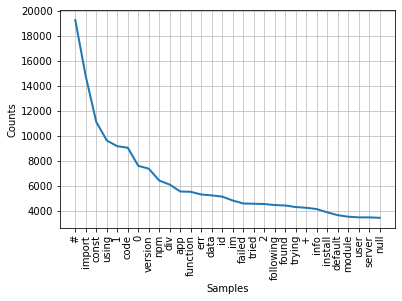

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [80]:
fdist.plot(30,cumulative=False)

In [92]:
tags=[['python',0],['javascript',0],['reactjs',0],['java',0],['android',0],['node',0],['c',0],['flutter',0],['typescript',0],['html',0]]
for i in range(len(tags)):
    tags[i][1]=int(fdist[tags[i][0]])


<BarContainer object of 10 artists>

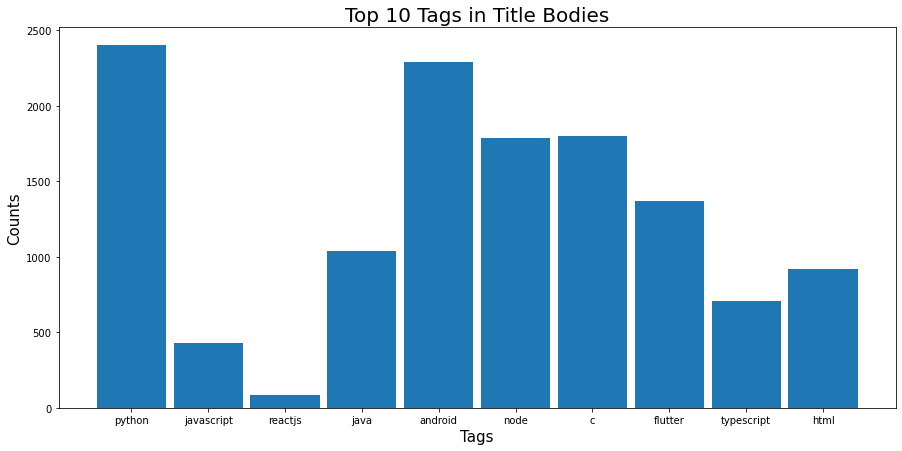

In [94]:
plt.figure(figsize=[15, 7])
plt.title('Top 10 Tags in Title Bodies', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Tags', fontsize=15)
nums = [tags[i][0] for i in range(10)]
weights = [tags[i][1] for i in range(10)]
plt.bar(nums, weights, width=0.9)